<a href="https://colab.research.google.com/github/hasyimya/pedulisekitar/blob/main/SoE_testcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the data
df = pd.read_csv('/content/american_bankruptcy.csv')
df.head()


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
# rename columns
di = {"X1": "current_assets",
     "X2": "cost_of_goods_sold",
     "X3": "depreciation_amortization",
     "X4": "ebitda",
     "X5": "inventory",
     "X6": "net_income",
     "X7": "total_receivables",
     "X8": "market_value",
     "X9": "net_sales",
     "X10": "total_assets",
     "X11": "total_longterm_debt",
     "X12": "ebit",
     "X13": "gross_profit",
     "X14": "total_current_liabilities",
     "X15": "retained_earnings",
     "X16": "total_revenue",
     "X17": "total_liabilities",
     "X18": "total_operating_expenses"}

df = df.rename(columns=di).drop(columns=["company_name"])

In [ ]:
df.head()

,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,total_longterm_debt,ebit,gross_profit,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [ ]:
# Check for missing data
missing_data = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the results
print("Missing Data:")
print(missing_data)

print("\nDuplicate Rows:")
print(duplicate_rows)

Missing Data:
status_label                 0
year                         0
current_assets               0
cost_of_goods_sold           0
depreciation_amortization    0
ebitda                       0
inventory                    0
net_income                   0
total_receivables            0
market_value                 0
net_sales                    0
total_assets                 0
total_longterm_debt          0
ebit                         0
gross_profit                 0
total_current_liabilities    0
retained_earnings            0
total_revenue                0
total_liabilities            0
total_operating_expenses     0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [status_label, year, current_assets, cost_of_goods_sold, depreciation_amortization, ebitda, inventory, net_income, total_receivables, market_value, net_sales, total_assets, total_longterm_debt, ebit, gross_profit, total_current_liabilities, retained_earnings, total_revenue, total_liabilities, total_operating_e

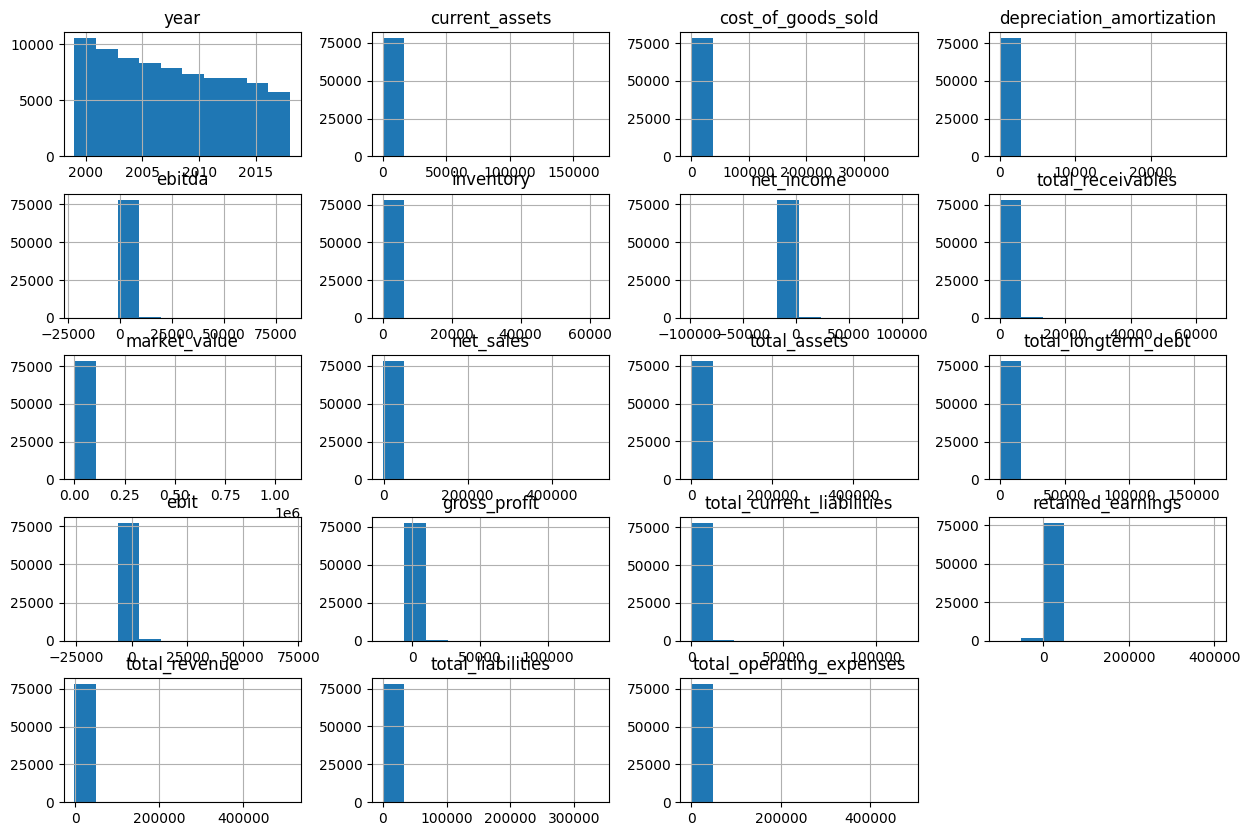

In [ ]:
# Plot the distribution of the features
df.hist(figsize=(15, 10))
plt.show()

<ipython-input-10-2f4eba5f026a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


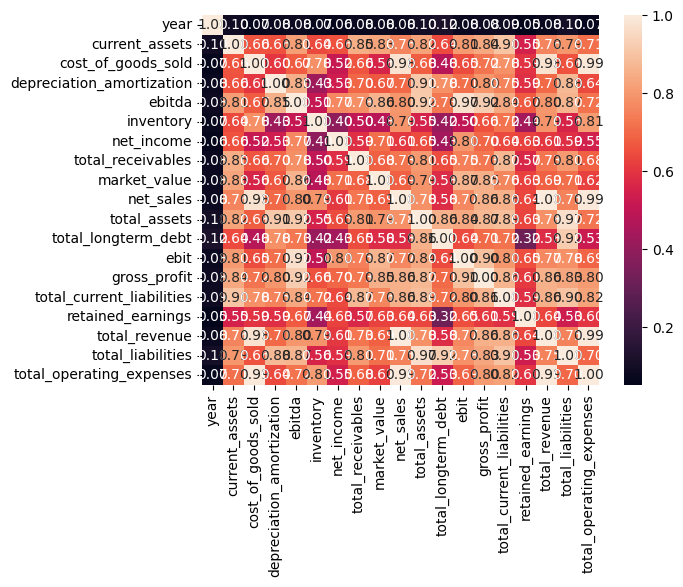

In [ ]:
# Create a correlation matrix to see the correlation between the features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

In [ ]:
# Data Pre-processing
# Convert the 'year' column to categorical
df['year'] = df['year'].astype('category')

In [ ]:
# Encode the 'status_label' column to numeric
label_encoder = LabelEncoder()
df['status_label'] = label_encoder.fit_transform(df['status_label'])

In [ ]:
# Separate features (X) and target (y)
X = df.drop('status_label', axis=1)  # Features
y = df['status_label']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the numeric features
numeric_features = ['current_assets', 'cost_of_goods_sold', 'depreciation_amortization', 'ebitda',
                    'inventory', 'net_income', 'total_receivables', 'market_value', 'net_sales',
                    'total_assets', 'total_longterm_debt', 'ebit', 'gross_profit',
                    'total_current_liabilities', 'retained_earnings', 'total_revenue',
                    'total_liabilities', 'total_operating_expenses']

In [ ]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [ ]:
# Model Fitting
# Choose a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print model performance metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9360742199911037
Confusion Matrix:
[[14665     4]
 [ 1002    66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14669
           1       0.94      0.06      0.12      1068

    accuracy                           0.94     15737
   macro avg       0.94      0.53      0.54     15737
weighted avg       0.94      0.94      0.91     15737



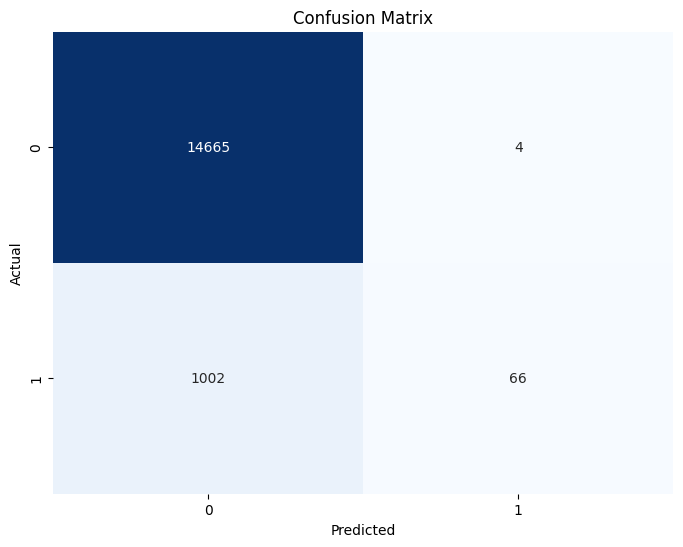

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()